# Loan-Prediction-Dataset

From the challange hosted at: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
## Problem Statement:

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

In [1]:
import numpy as np
import pandas as pd

In [2]:
test_data = pd.read_csv('./test.csv')
train_data = pd.read_csv("./train.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---
It appears that there's a mix of categorical and numerical features. There are also some rows with no information in certain columns (filled with NaN)

Usually I ignore all rows that have NaNs, so that they don't affect my model. But in the real world (or in the case of this prediction problem), the test data set does have NaNs and by ignoring NaNs I won't be able to give a prediction. So I will fill out these NaNs with the most frequent value for that feature

In [4]:
# number of NaNs per colums
len(train_data) - train_data.count()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

---

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Siddarth/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Siddarth/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Siddarth/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


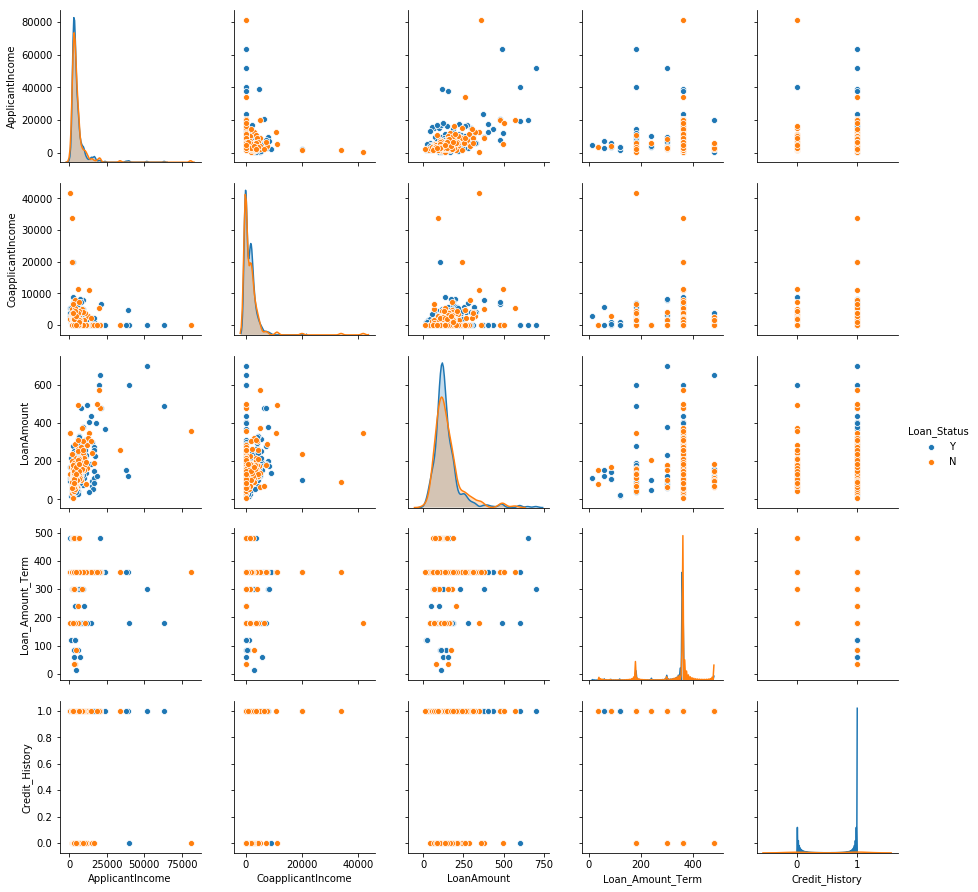

In [6]:
sns.pairplot(train_data,hue='Loan_Status')

---

In [7]:
# fill NaNs with most frequent values for that column
default_values= {}
for i in train_data.columns[1:-1]:
    mode_value = train_data[i].mode()[0]
    train_data[i].fillna(mode_value,inplace=True)
    default_values[i] = mode_value
    test_data[i].fillna(mode_value,inplace=True)
print("Default Values:")
default_values

Default Values:


{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 2500,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 120.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Semiurban'}

In [8]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---
Now we don't have NaNs anymore. However, Loan_ID feature isn't something that contributes to the outcome of the loan decision. So I'll drop that.

In [9]:
# drop Loan_ID column so that it doesn't affect the prediction outcome
train_data.dropna(axis=0).drop(columns=['Loan_ID']).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# drop Loan_ID column so that it doesn't affect the prediction outcome
test_data.drop(columns=['Loan_ID']).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


---
Since the data has both categorical and numerical, I'll convert all categorical values to numerical ones using LabelEncoder

In [11]:
X_train = train_data.drop(columns=['Loan_ID','Loan_Status'])
y_train = train_data.Loan_Status

In [12]:
X_test = test_data.drop(columns=['Loan_ID'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtypes=='object':
        le.fit(X_train[col].values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [14]:
# Convert Loan_status (target variable) from catergorical to numerical variable (Y=1, N=0)
y_train.replace('Y',1,inplace=True)
y_train.replace('N',0,inplace=True)

In [15]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


### Scaling

from sklearn.preprocessing import StandardScaler,RobustScaler
rb_sc = RobustScaler()
X_train  = rb_sc.fit_transform(X_train[X_train.columns])
X_test = rb_sc.transform(X_test[X_test.columns]);

### Decision Trees

In [16]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
model_dtc = tree.DecisionTreeClassifier()
scores_dtc = cross_val_score(model_dtc, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dtc.mean(), scores_dtc.std() * 2))

Accuracy: 0.72 (+/- 0.11)


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=50,criterion='entropy',
                                   max_depth=3, max_features=4,
                                   class_weight='balanced_subsample')
scores_rfc = cross_val_score(model_rfc, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rfc.mean(), scores_rfc.std() * 2))

Accuracy: 0.80 (+/- 0.06)


### Support Vector Machines

In [18]:
from sklearn import svm
model_svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
scores_svm = cross_val_score(model_svm, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy: 0.66 (+/- 0.03)


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver='lbfgs', multi_class='multinomial',class_weight='balanced')
scores_log = cross_val_score(model_log, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

Accuracy: 0.77 (+/- 0.11)


/Users/Siddarth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Siddarth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/Siddarth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### k-neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier(n_neighbors=15)
scores_knc = cross_val_score(model_knc, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knc.mean(), scores_knc.std() * 2))

Accuracy: 0.67 (+/- 0.04)


---
Random Forest seems to do the best job among these classifiers. Let's use this model to predict outcome on our test set
### Predictions

In [21]:
model_rfc.fit(X_train, y_train)
predictions = model_rfc.predict(X_test)

In [25]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
#Create a series with feature importances:
featimp = pd.Series(model_rfc.feature_importances_, index=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']).sort_values(ascending=False)
print (featimp)

Credit_History       0.681188
LoanAmount           0.101166
ApplicantIncome      0.065596
CoapplicantIncome    0.046133
Loan_Amount_Term     0.033627
Property_Area        0.028039
Dependents           0.016564
Married              0.014392
Education            0.007655
Self_Employed        0.003227
Gender               0.002412
dtype: float64


In [27]:
len(predictions)

367

In [28]:
len(test_data)

367

In [29]:
result = list(zip(test_data['Loan_ID'],predictions))
result = pd.DataFrame(result,columns= ['Loan_ID', 'Loan_Status'])
result.replace(1,'Y',inplace=True)
result.replace(0,'N',inplace=True)

In [30]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [31]:
result.to_csv('./predictions.csv',index=False,header=True)